In [ ]:
import torch
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

*Source: Book - DeepLearning with Torch*

# Mechanics of Learning
---

## Chapter 1
---

In [ ]:
t_c = [0.5, 14.0, 15.0, 28.0, 11.0, 8.0, 3.0,-4.0, 6.0, 13.0, 21.0] # celcius
t_u = [35.7, 55.9, 58.2, 81.9, 56.3, 48.9, 33.9, 21.8, 48.4, 60.4, 68.4] # units

# change to tensor
t_c = torch.tensor(t_c)
t_u = torch.tensor(t_u)

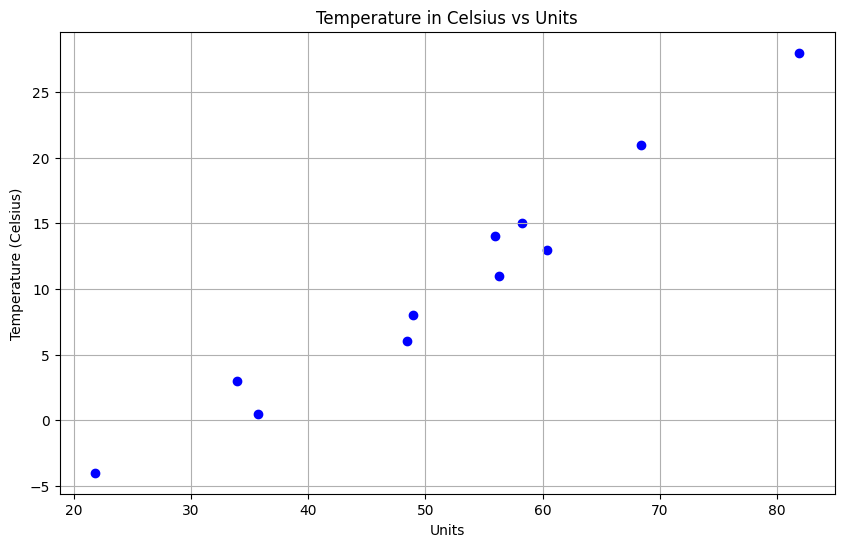

In [ ]:
# visualization
plt.figure(figsize=(10, 6))
plt.scatter(t_u, t_c, marker='o', color='blue')
plt.title('Temperature in Celsius vs Units')
plt.xlabel('Units')
plt.ylabel('Temperature (Celsius)')
plt.grid(True)
plt.show()

Choosing linear model

t_c = w *t_u + b

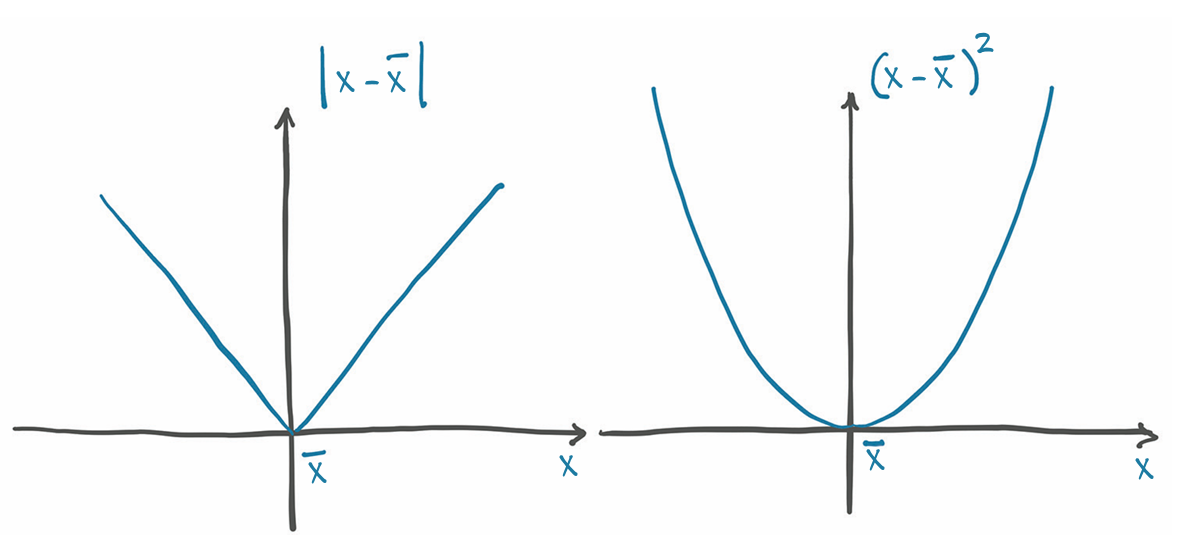

In [ ]:
from IPython import display
display.Image("/home/work/youtube/Deep Learning/convex function.png")

In [ ]:
# find lost function (cost function)

def model(t_u , w, b):
    """Linear Model"""
    return w * t_u + b

def loss_fn(t_p, t_c):
    """Loss function for obtain good convex function"""
    squared_diffs = (t_p + t_c)**2
    return squared_diffs

In [ ]:
# using 1 for weight and 0 for bias
w = torch.ones(())
b = torch.zeros(())

t_p = model(t_u, w, b)
t_p

tensor([35.7000, 55.9000, 58.2000, 81.9000, 56.3000, 48.9000, 33.9000, 21.8000,
        48.4000, 60.4000, 68.4000])

In [ ]:
# check loss function
loss = loss_fn(t_p, t_c)
loss

tensor([ 1310.4401,  4886.0103,  5358.2397, 12078.0107,  4529.2905,  3237.6101,
         1361.6101,   316.8400,  2959.3601,  5387.5601,  7992.3604])

Optimze loss function using gradient descent

The idea is to compute the rate of change of the loss with respect to each parameter, and modify each parameter in the direction of decreasing loss

In [ ]:
# gradient descent
delta = 0.1

loss_rate_of_change_w = (loss_fn(model(t_u, w + delta, b), t_c) - loss_fn(model(t_u, w - delta, b), t_c) / 2.0 * delta)

loss_rate_of_change_w

tensor([ 1528.4171,  5491.9521,  6017.1577, 13428.0029,  5128.6255,  3682.7527,
         1567.1382,   387.0012,  3386.5679,  6083.8452,  8921.3311])

If the change is negative, then we need to increase w to minimize the loss, whereas if the change is positive, we need to decrease w.

In [ ]:
learning_rate = 1e-2 # 0.01

w = w-learning_rate * loss_rate_of_change_w

w

tensor([ -14.2842,  -53.9195,  -59.1716, -133.2800,  -50.2863,  -35.8275,
         -14.6714,   -2.8700,  -32.8657,  -59.8385,  -88.2133])

In [ ]:
loss_rate_of_change_b = (loss_fn(model(t_u, w, b + delta), t_c) - loss_fn(model(t_u, w, b- delta), t_c) / 2.0 * delta)

loss_rate_of_change_b

tensor([2.4645e+05, 8.5499e+06, 1.1168e+07, 1.1261e+08, 7.5548e+06, 2.8890e+06,
        2.3207e+05, 4.1955e+03, 2.3854e+06, 1.2320e+07, 3.4345e+07])

In [ ]:
b = b-learning_rate * loss_rate_of_change_b
b

tensor([-2.4645e+03, -8.5499e+04, -1.1168e+05, -1.1261e+06, -7.5548e+04,
        -2.8890e+04, -2.3207e+03, -4.1955e+01, -2.3854e+04, -1.2320e+05,
        -3.4345e+05])

## Chapter 2
---

what if we obtain derivatives

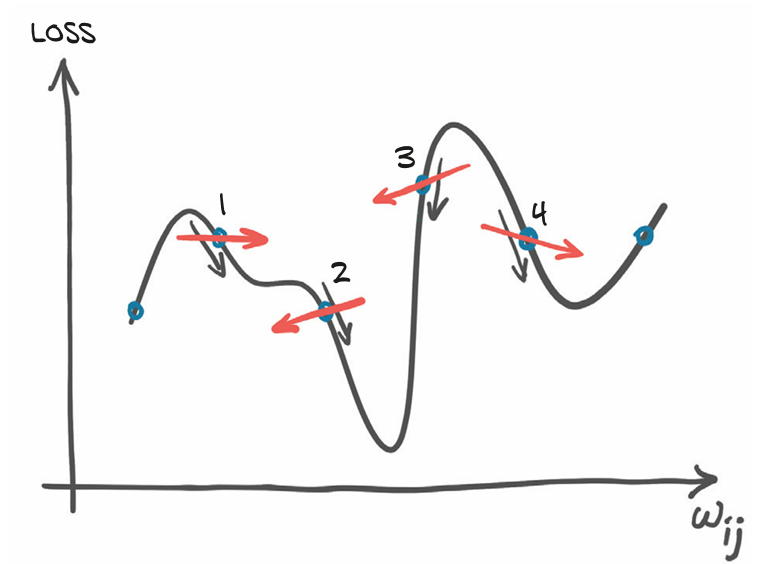

In [ ]:
from IPython import display
display.Image("/home/work/youtube/Deep Learning/derivative.png")

In [ ]:
def loss_fn(t_p, t_c):
    """Loss function"""
    squared_diffs = (t_p - t_c) ** 2
    return squared_diffs.mean()

def dloss_fn(t_p, t_c):
    """Derivative Loss function"""
    dsq_diffs = 2 * (t_p - t_c) / t_p.size(0)
    return dsq_diffs

def model(t_u, w, b):
    return w * t_u + b

def dmodel_dw(t_u, w, b):
    return t_u

def dmodel_db(t_u, w, b):
    return 1.0

what is the different?, loss_fn obtain how big the **incorrect prediction** is, then dloss_fn is how big the loss **change**

Now create a gradient function

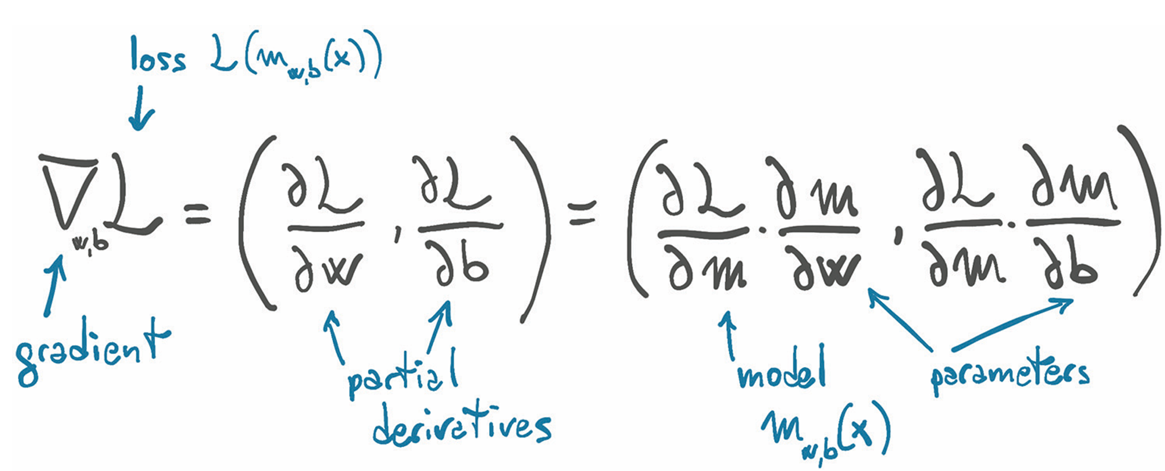

In [ ]:
from IPython import display
display.Image("/home/work/youtube/Deep Learning/gradient_function.png")

In [ ]:
def grad_fn(t_u, t_c, t_p, w, b):
    """Calculate gradient function"""

    # obtain result loss derivative
    dloss_dtp = dloss_fn(t_p, t_c)

    # derivative result of loss of weight
    dloss_dw = dloss_dtp * dmodel_dw(t_u, w, b)

    # derivative result of loss of bias
    dloss_db = dloss_dtp * dmodel_db(t_u, w, b)

    # mix to one values torch format
    return torch.stack([dloss_dw.sum(), dloss_db.sum()])

In [ ]:
# looping with epoch
def training_loop(n_epochs, learning_rate, params, t_u, t_c):
    """Information for obtain Loss each epochs"""
    for epoch in range(1, n_epochs + 1):
        w, b = params

        t_p = model(t_u, w, b) # model
        loss = loss_fn(t_p, t_c) # loss function
        grad = grad_fn(t_p, t_c, w, b) # gradient function

        # adapt change gradient each model params
        params = params - learning_rate * grad

        # loop result of epoch
        print('Epoch %d, Loss %f' %(epoch, float(loss)))

In [ ]:
def training_loop(n_epochs, learning_rate, params, t_u, t_c,
                  print_params=True):
    """Information for obtain Loss, grad, and params"""
    for epoch in range(1, n_epochs + 1):
        w, b = params

        t_p = model(t_u, w, b)  # <1>
        loss = loss_fn(t_p, t_c)
        grad = grad_fn(t_u, t_c, t_p, w, b)  # <2>

        params = params - learning_rate * grad

        # not all show epoch process
        if epoch in {1, 2, 3, 10, 11, 99, 100, 4000, 5000}:  # <3>
            print('Epoch %d, Loss %f' % (epoch, float(loss)))

            if print_params:
                print('    Params:', params)
                print('    Grad:  ', grad)

        if epoch in {4, 12, 101}:
            print('...')

        if not torch.isfinite(loss).all():
            break  # <3>

    return params

In [ ]:
# testing 1
training_loop(
    n_epochs=100,
    learning_rate=1e-2,
    params=torch.tensor([1.0, 0.0]),
    t_u=t_u,
    t_c=t_c
)

Epoch 1, Loss 1763.884766
    Params: tensor([-44.1730,  -0.8260])
    Grad:   tensor([4517.2964,   82.6000])
Epoch 2, Loss 5802484.500000
    Params: tensor([2568.4011,   45.1637])
    Grad:   tensor([-261257.4062,   -4598.9702])
Epoch 3, Loss 19408029696.000000
    Params: tensor([-148527.7344,   -2616.3931])
    Grad:   tensor([15109614.0000,   266155.6875])
...
Epoch 10, Loss 90901105189019073810297959556841472.000000
    Params: tensor([3.2144e+17, 5.6621e+15])
    Grad:   tensor([-3.2700e+19, -5.7600e+17])
Epoch 11, Loss inf
    Params: tensor([-1.8590e+19, -3.2746e+17])
    Grad:   tensor([1.8912e+21, 3.3313e+19])


tensor([-1.8590e+19, -3.2746e+17])

## Chapter 3
---

why is more over Loss?, we can interpret with this image below

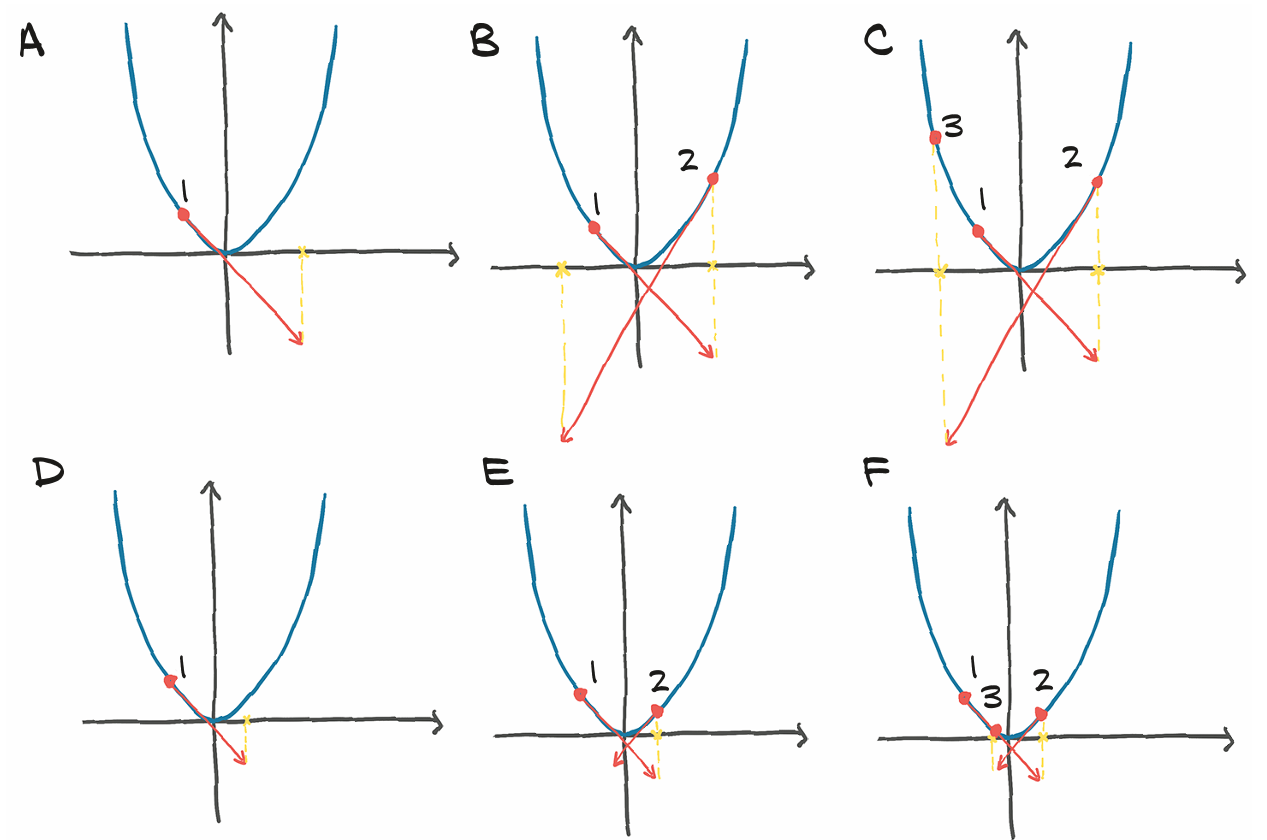

In [ ]:
from IPython import display
display.Image("/home/work/youtube/Deep Learning/loss.png")

How we can stop magnitude fluktiative?

limits the magnitude of the product between learning_rate and gradient (learning_rate * grad).

In [ ]:
# testing 2
training_loop(
    n_epochs=100,
    learning_rate=1e-4,
    params=torch.tensor([1.0, 0.0]),
    t_u=t_u,
    t_c=t_c
)

Epoch 1, Loss 1763.884766
    Params: tensor([ 0.5483, -0.0083])
    Grad:   tensor([4517.2964,   82.6000])
Epoch 2, Loss 323.090515
    Params: tensor([ 0.3623, -0.0118])
    Grad:   tensor([1859.5493,   35.7843])
Epoch 3, Loss 78.929634
    Params: tensor([ 0.2858, -0.0135])
    Grad:   tensor([765.4666,  16.5122])
...
Epoch 10, Loss 29.105247
    Params: tensor([ 0.2324, -0.0166])
    Grad:   tensor([1.4803, 3.0544])
Epoch 11, Loss 29.104168
    Params: tensor([ 0.2323, -0.0169])
    Grad:   tensor([0.5781, 3.0384])
...
Epoch 99, Loss 29.023582
    Params: tensor([ 0.2327, -0.0435])
    Grad:   tensor([-0.0533,  3.0226])
Epoch 100, Loss 29.022667
    Params: tensor([ 0.2327, -0.0438])
    Grad:   tensor([-0.0532,  3.0226])


tensor([ 0.2327, -0.0438])

Good we obtain stable epoch loss!

Before we not normalized between input and output, this is can effect to scale X and y

In [ ]:
# testing 3
t_un = 0.1 * t_u

training_loop(
    n_epochs=100,
    learning_rate=1e-2,
    params=torch.tensor([1.0, 0.0]),
    t_u=t_un,
    t_c=t_c
)

Epoch 1, Loss 80.364342
    Params: tensor([1.7761, 0.1064])
    Grad:   tensor([-77.6140, -10.6400])
Epoch 2, Loss 37.574913
    Params: tensor([2.0848, 0.1303])
    Grad:   tensor([-30.8623,  -2.3864])
Epoch 3, Loss 30.871077
    Params: tensor([2.2094, 0.1217])
    Grad:   tensor([-12.4631,   0.8587])
...
Epoch 10, Loss 29.030489
    Params: tensor([ 2.3232, -0.0710])
    Grad:   tensor([-0.5355,  2.9295])
Epoch 11, Loss 28.941877
    Params: tensor([ 2.3284, -0.1003])
    Grad:   tensor([-0.5240,  2.9264])
...
Epoch 99, Loss 22.214186
    Params: tensor([ 2.7508, -2.4910])
    Grad:   tensor([-0.4453,  2.5208])
Epoch 100, Loss 22.148710
    Params: tensor([ 2.7553, -2.5162])
    Grad:   tensor([-0.4446,  2.5165])


tensor([ 2.7553, -2.5162])

In [ ]:
# training 3
# add more epochs

training_loop(
    n_epochs=5000,
    learning_rate=1e-2,
    params=torch.tensor([1.0, 0.0]),
    t_u=t_un,
    t_c=t_c
)

Epoch 1, Loss 80.364342
    Params: tensor([1.7761, 0.1064])
    Grad:   tensor([-77.6140, -10.6400])
Epoch 2, Loss 37.574913
    Params: tensor([2.0848, 0.1303])
    Grad:   tensor([-30.8623,  -2.3864])
Epoch 3, Loss 30.871077
    Params: tensor([2.2094, 0.1217])
    Grad:   tensor([-12.4631,   0.8587])
...
Epoch 10, Loss 29.030489
    Params: tensor([ 2.3232, -0.0710])
    Grad:   tensor([-0.5355,  2.9295])
Epoch 11, Loss 28.941877
    Params: tensor([ 2.3284, -0.1003])
    Grad:   tensor([-0.5240,  2.9264])
...
Epoch 99, Loss 22.214186
    Params: tensor([ 2.7508, -2.4910])
    Grad:   tensor([-0.4453,  2.5208])
Epoch 100, Loss 22.148710
    Params: tensor([ 2.7553, -2.5162])
    Grad:   tensor([-0.4446,  2.5165])
...


Epoch 4000, Loss 2.927680
    Params: tensor([  5.3643, -17.2853])
    Grad:   tensor([-0.0006,  0.0033])
Epoch 5000, Loss 2.927648
    Params: tensor([  5.3671, -17.3012])
    Grad:   tensor([-0.0001,  0.0006])


tensor([  5.3671, -17.3012])

In [ ]:
# Add new params is autograd
params = torch.tensor([1.0, 0.0], requires_grad=True)

# check autograd
params.grad is None


True

In [ ]:
# check loss
loss = loss_fn(model(t_u, *params), t_c)

# call backward for obtain loss optimum
loss.backward()

params.grad

tensor([4517.2969,   82.6000])

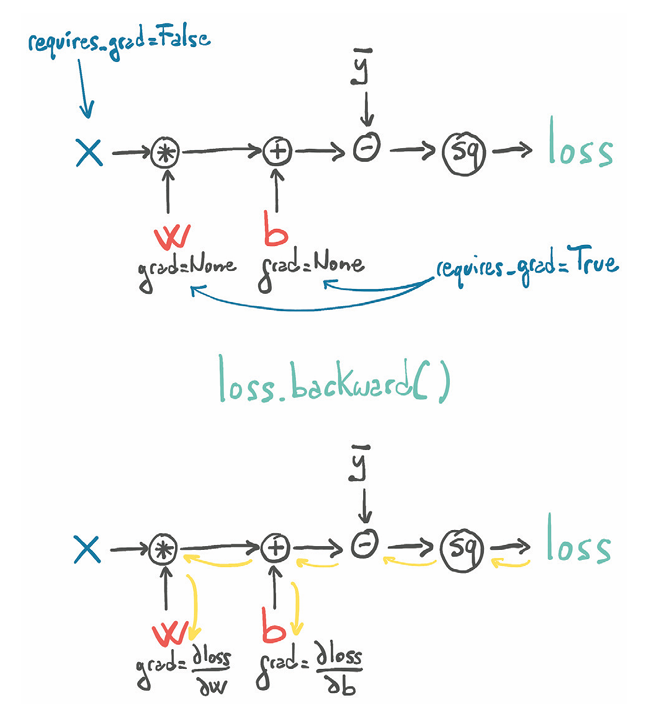

In [ ]:
from IPython import display
display.Image("/home/work/youtube/Deep Learning/autograd.png")

PyTorch can calculate loss gradient to tensor-parameter moment backpropagation.

In [ ]:
# upgard backpropogation

def training_loop(n_epochs, learning_rate, params, t_u, t_c):
    """Training with update backward"""
    for epoch in range(1, n_epochs + 1):

        if params.grad is not None:
            params.grad.zero_()  # restart epoch

        # Forward pass
        t_p = model(t_u, params[0], params[1]) # model

        # Compute the loss function
        loss = loss_fn(t_p, t_c) # loss function

        # Backward pass
        loss.backward()

        # Update parameters using SGD
        with torch.no_grad():
            params -= learning_rate * params.grad

        # Print loss every 500 epochs
        if epoch % 500 == 0 :
            print('Epoch %d, Loss %f' % (epoch, float(loss)))

In [ ]:
# testing 4
training_loop(
    n_epochs=5000,
    learning_rate = 1e-2,
    params = torch.tensor([1.0, 0.0], requires_grad = True),
    t_u = t_un,
    t_c = t_c
)

Epoch 500, Loss 7.860115
Epoch 1000, Loss 3.828538
Epoch 1500, Loss 3.092191
Epoch 2000, Loss 2.957698
Epoch 2500, Loss 2.933134
Epoch 3000, Loss 2.928648
Epoch 3500, Loss 2.927830
Epoch 4000, Loss 2.927679
Epoch 4500, Loss 2.927652
Epoch 5000, Loss 2.927647


Before we must update parameter manual, now we can auto optimum

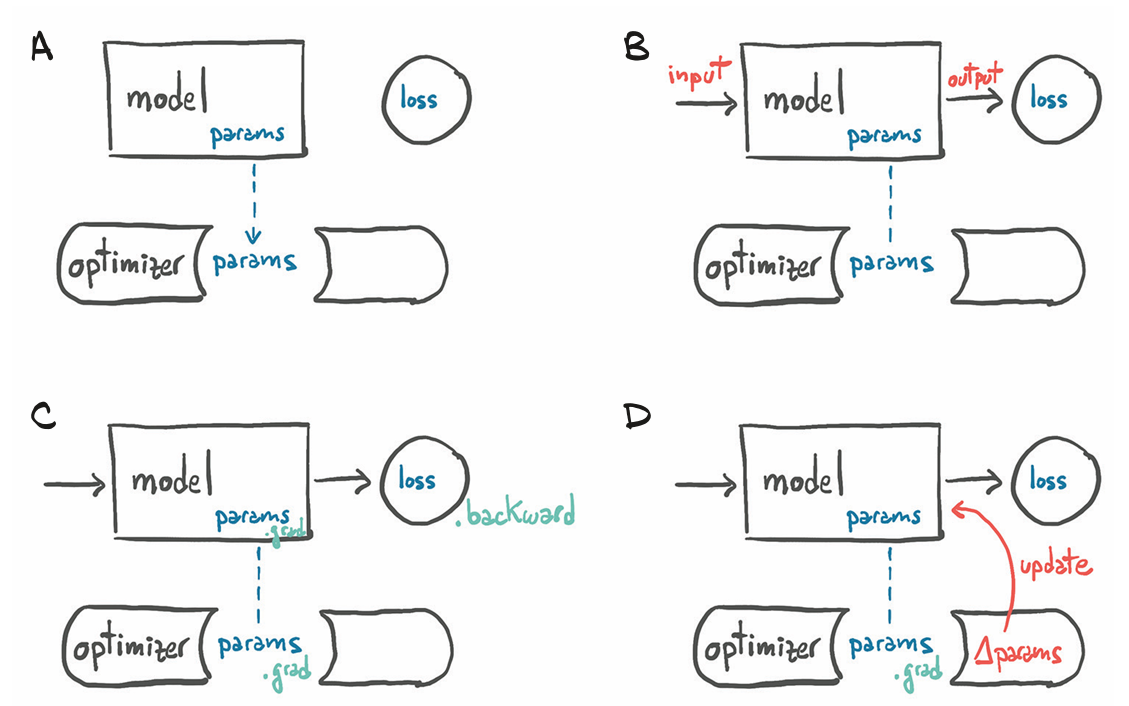

In [ ]:
# optimize SGD Formula
from IPython import display
display.Image("/home/work/youtube/Deep Learning/Optimum.png")

## Chapter 4
---

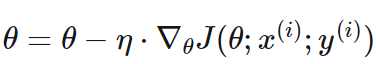

In [ ]:
# optimize SGD Formula
from IPython import display
display.Image("/home/work/youtube/Deep Learning/SGD.png")

- θ : Parameter-model.
- η : Learning rate
- J(θ;x (i);y (i)) : Loss function
- ∇θ J(θ;x (i) ;y (i)) : Gradient Loss Function

In [ ]:
import torch.optim as optim

# params
params = torch.tensor([1.0, 0.0], requires_grad=True)

# learning rate
learning_rate = 1e-2

# optimizer
optimizer = optim.SGD([params], lr=learning_rate)

In [ ]:
# Forward model
t_p = model(t_un, *params)

# loss function
loss = loss_fn(t_p, t_c)

In [ ]:
# optimizer loss
optimizer.zero_grad()

# obtain backward
loss.backward()

# optimze each step
optimizer.step()

params

tensor([1.7761, 0.1064], requires_grad=True)

In [ ]:
def training_loop(n_epochs, optimizer, params, t_u, t_c):
    """Upgrade training loop with optim"""
    for epoch in range(1, n_epochs + 1):

        # calculate with model
        t_p = model(t_u, *params)

        # obtain loss function
        loss = loss_fn(t_p, t_c)

        optimizer.zero_grad()  # Reset each epoch
        loss.backward()  # Backward
        optimizer.step()  # Optimizer each step loss after backward

        if epoch % 500 == 0:
            print('Epoch %d, Loss %f' % (epoch, float(loss)))

    return params

In [ ]:
# testing 5
params = torch.tensor([1.0, 0.0], requires_grad=True)
learning_rate = 1e-2
optimizer = optim.SGD([params], lr=learning_rate)

# loop
training_loop(
    n_epochs = 5000,
    optimizer = optimizer,
    params = params,
    t_u = t_un,
    t_c = t_c
    )

Epoch 500, Loss 7.860120
Epoch 1000, Loss 3.828538
Epoch 1500, Loss 3.092191
Epoch 2000, Loss 2.957698
Epoch 2500, Loss 2.933134
Epoch 3000, Loss 2.928648
Epoch 3500, Loss 2.927830
Epoch 4000, Loss 2.927679
Epoch 4500, Loss 2.927652
Epoch 5000, Loss 2.927647


tensor([  5.3671, -17.3012], requires_grad=True)

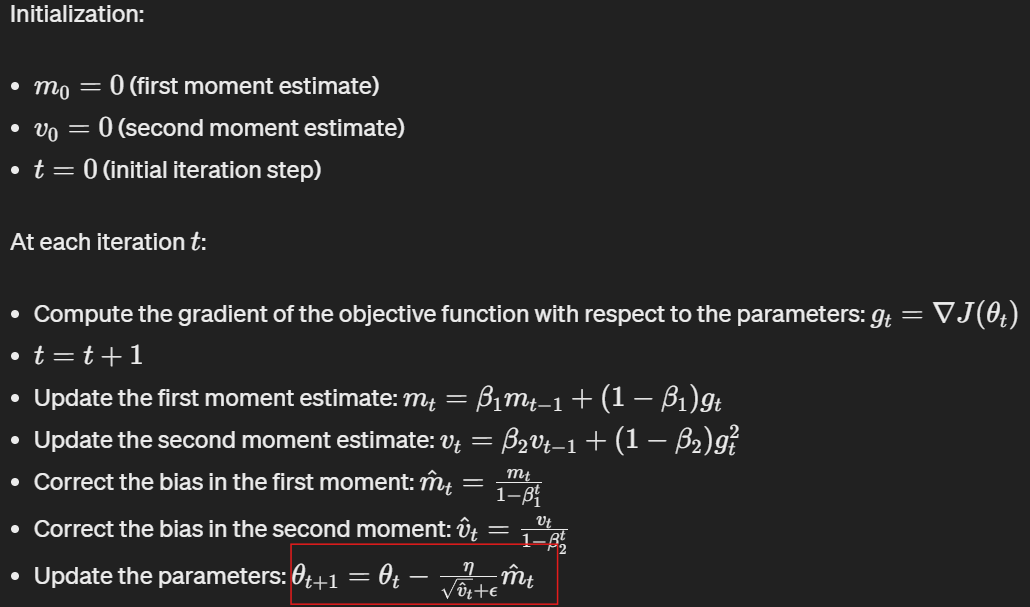

In [ ]:
from IPython import display
display.Image("/home/work/youtube/Deep Learning/ADAM.png")

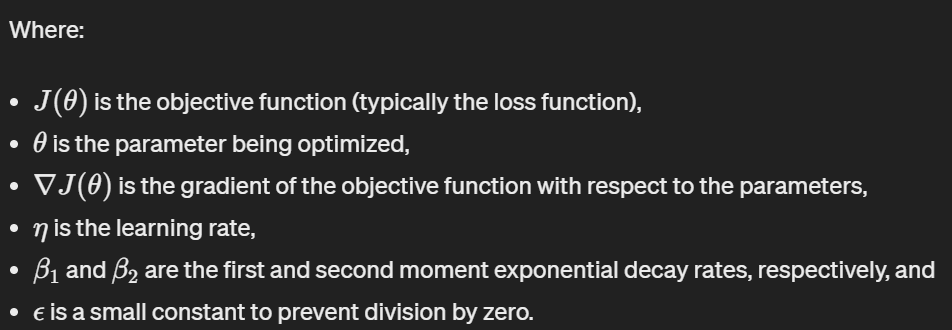

In [ ]:
display.Image("/home/work/youtube/Deep Learning/adam 2.png")

This formulation is adapted from the original paper "Adam: A Method for Stochastic Optimization" by Diederik P. Kingma and Jimmy Ba, published in 2014.

In [ ]:
# Testing 6 with ADAM
params = torch.tensor([1.0, 0.0], requires_grad=True)
learning_rate = 1e-2
optimizer = optim.Adam([params], lr=learning_rate)

# loop
training_loop(
    n_epochs = 5000,
    optimizer = optimizer,
    params = params,
    t_u = t_un,
    t_c = t_c
    )

Epoch 500, Loss 24.946455
Epoch 1000, Loss 15.752771
Epoch 1500, Loss 9.455151
Epoch 2000, Loss 5.767542
Epoch 2500, Loss 3.932838
Epoch 3000, Loss 3.196811
Epoch 3500, Loss 2.977151
Epoch 4000, Loss 2.933181
Epoch 4500, Loss 2.927968
Epoch 5000, Loss 2.927654


tensor([  5.3660, -17.2952], requires_grad=True)

In [ ]:
t_u

tensor([35.7000, 55.9000, 58.2000, 81.9000, 56.3000, 48.9000, 33.9000, 21.8000,
        48.4000, 60.4000, 68.4000])

In [ ]:
# evaluation
n_sample = t_u.shape[0]
print('Total sample', n_sample)

n_val = int(0.2 * n_sample)
print('Split for valid', n_val)

# random
shuffled = torch.randperm(n_sample) # ex [a, b, c] to  [c, a, b], [b, c, a], [a, c, b]
print(shuffled)

Total sample 11
Split for valid 2
tensor([ 8,  3,  5,  6,  1,  7,  0,  9,  4,  2, 10])


In [ ]:
# slice to train and val
train_indices = shuffled[:-n_val] # 80%
valid_indices = shuffled[-n_val:] # 20%

train_indices, valid_indices

(tensor([8, 3, 5, 6, 1, 7, 0, 9, 4]), tensor([ 2, 10]))

In [ ]:
# do to data feature and target
train_t_u = t_u[train_indices]
train_t_c = t_c[train_indices]

val_t_u = t_u[valid_indices]
val_t_c = t_c[valid_indices]

# normalize
train_t_un = 0.1 * train_t_u
val_t_un = 0.1 * val_t_u

In [ ]:
def training_loop(n_epochs, optimizer, params,
                  train_t_u, val_t_u, train_t_c,
                  val_t_c):
    """Validation model with data train and valid"""

    # inilize
    train_losses = []
    val_losses = []

    for epoch in range(1, n_epochs + 1):

        # do in data train
        train_t_p = model(train_t_u, *params)
        train_loss = loss_fn(train_t_p, train_t_c)

        # do in data val
        val_t_p = model(val_t_u, *params)
        val_loss = loss_fn(val_t_p, val_t_c)

        # do optimizer
        optimizer.zero_grad() # restart iteration loss
        train_loss.backward() # backward
        optimizer.step() # optimze each step

        train_losses.append(train_loss.item())
        val_losses.append(val_loss.item())

        if epoch <=3 or epoch % 500 == 0:
            print(f"Epoch {epoch}, Training loss {train_loss.item():.4f},"
                f" Validation loss {val_loss.item():.4f}")

    return params, train_losses, val_losses

In [ ]:
# testing
params = torch.tensor([1.0, 0.0], requires_grad=True)
learning_rate = 1e-2
optimizer = optim.SGD([params], lr=learning_rate)

# training
params, train_losses, val_losses = training_loop(
                                                n_epochs = 3000,
                                                optimizer = optimizer,
                                                params = params,
                                                train_t_u = train_t_un,
                                                val_t_u = val_t_un,
                                                train_t_c = train_t_c,
                                                val_t_c = val_t_c
                                                )

params

Epoch 1, Training loss 66.5811, Validation loss 142.3890
Epoch 2, Training loss 38.8626, Validation loss 64.0434
Epoch 3, Training loss 33.3475, Validation loss 39.4590


Epoch 500, Training loss 7.1454, Validation loss 9.1252
Epoch 1000, Training loss 3.5940, Validation loss 5.3110
Epoch 1500, Training loss 3.0942, Validation loss 4.1611
Epoch 2000, Training loss 3.0238, Validation loss 3.7693
Epoch 2500, Training loss 3.0139, Validation loss 3.6278
Epoch 3000, Training loss 3.0125, Validation loss 3.5756


tensor([  5.1964, -16.7512], requires_grad=True)

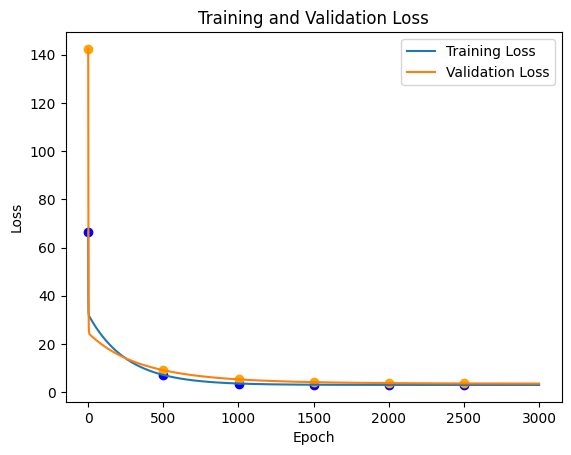

In [ ]:
# visualize
epochs = range(1, len(train_losses) + 1)
plt.plot(epochs, train_losses, label='Training Loss')
plt.plot(epochs, val_losses, label='Validation Loss')
plt.scatter(epochs[::500], train_losses[::500], marker='o', color='blue')
plt.scatter(epochs[::500], val_losses[::500], marker='o', color='orange')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

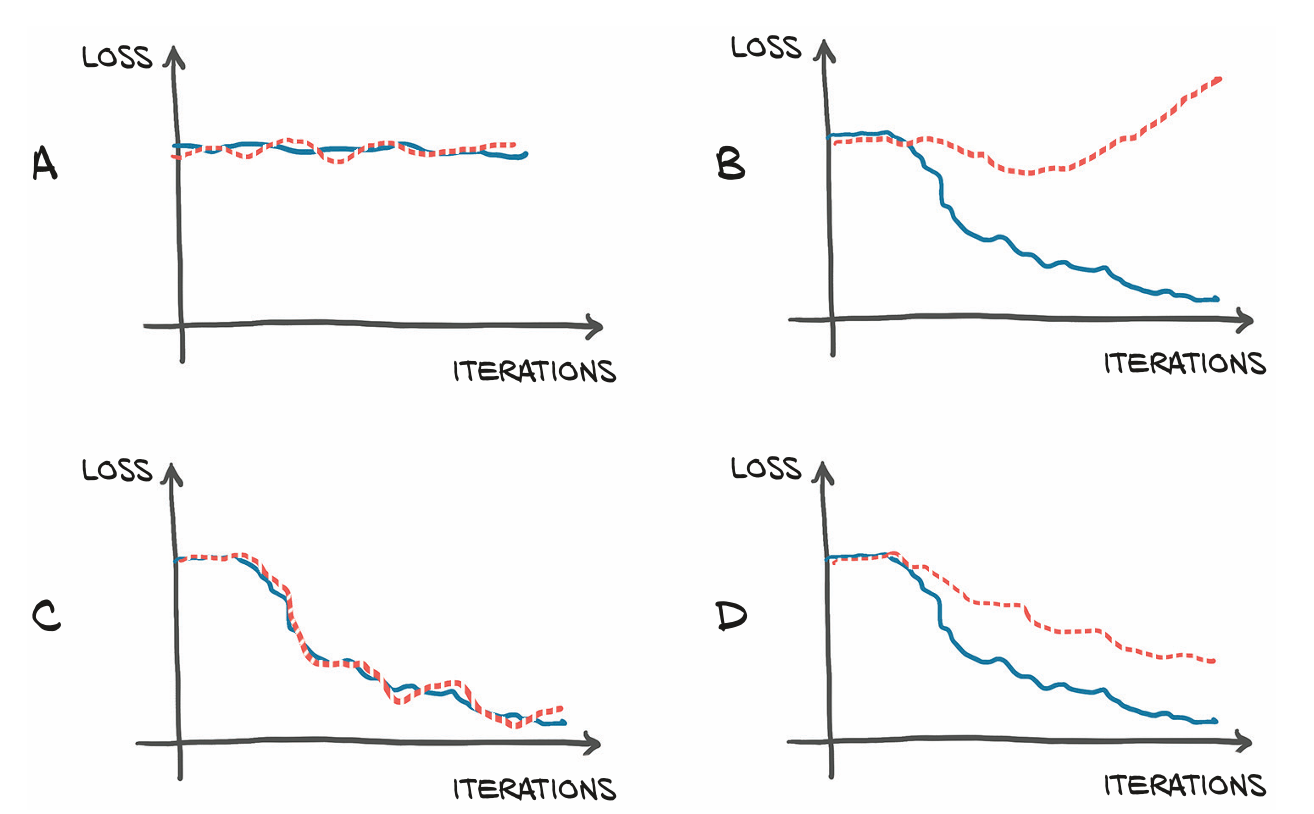

In [ ]:
from IPython import display
display.Image("/home/work/youtube/Deep Learning/ovt.png")

- (A) Training and validation losses do not decrease; the model is not learning due to no
information in the data or insufficient capacity of the model.
- (B) Training loss decreases while
validation loss increases: overfitting.
- (C) Training and validation losses decrease exactly in tandem.
Performance may be improved further as the model is not at the limit of overfitting.
- (D) Training and validation losses have different absolute values but similar trends

# Neural Network for Fit Data
---

## Chapter 1
---

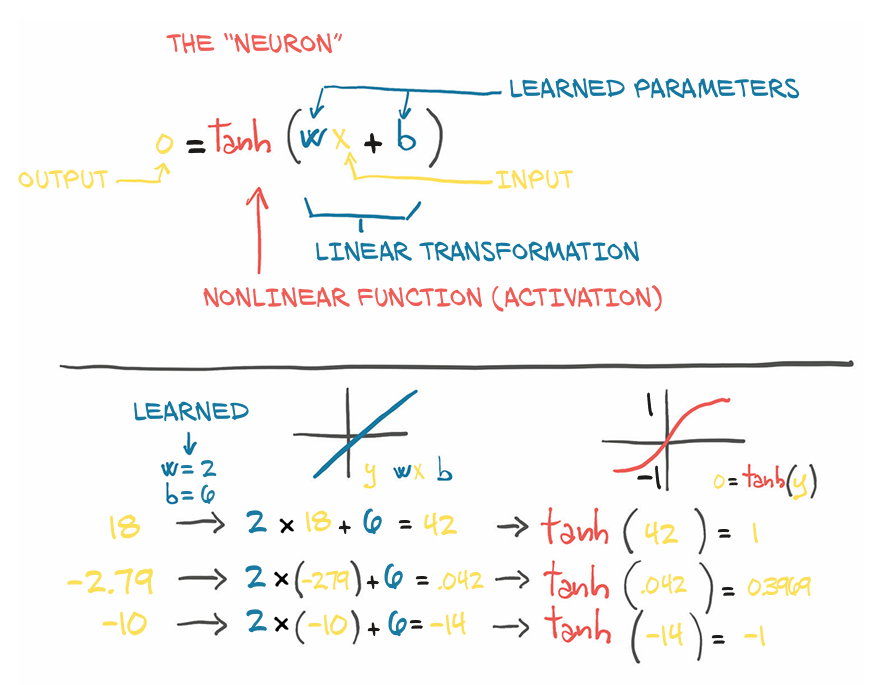

In [ ]:
from IPython import display
display.Image("/home/work/youtube/Deep Learning/activation.png")

Why must we add activation? for avoid Vanishing Gradient and exploding, because we not want to input / output each neuron have small or over big information.

Why is it non-linear? Because we don't know how data work, we must be robust and obtain complex correlation data.

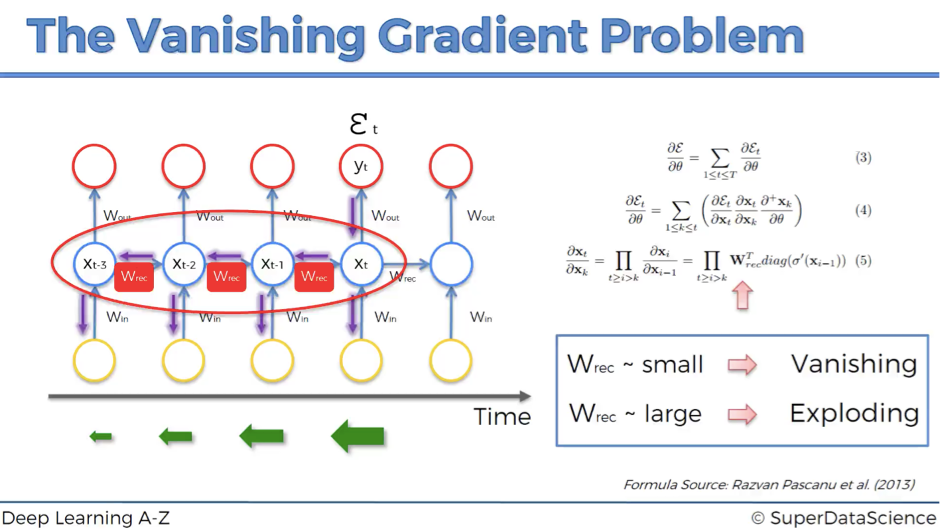

In [ ]:
from IPython import display
display.Image("/home/work/youtube/Deep Learning/vanish.png")

how to activation this work?

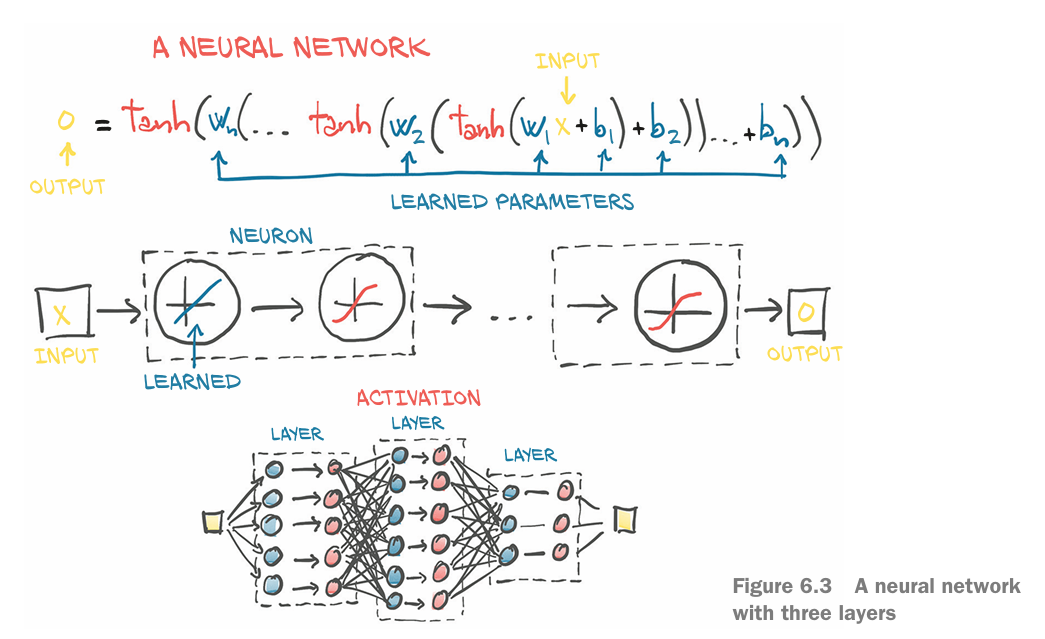

In [ ]:
from IPython import display
display.Image("/home/work/youtube/Deep Learning/work activation.png")

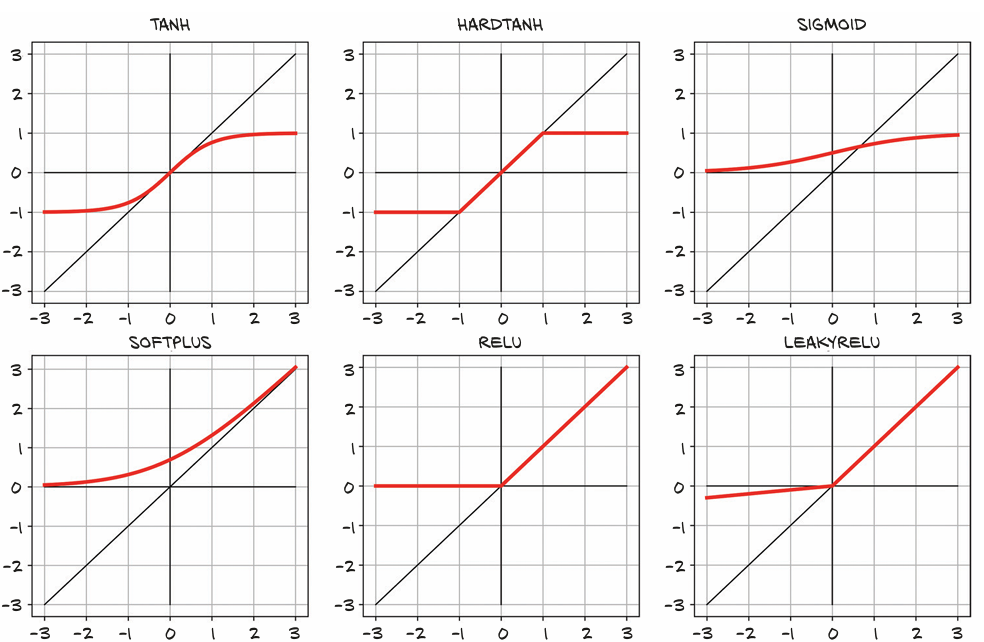

In [ ]:
from IPython import display
display.Image("/home/work/youtube/Deep Learning/kind of activ.png")

In [ ]:
# using model with modul nn linear
import torch.nn as nn

def training_loop(n_epochs, optimizer, model,
                  loss_fn, train_t_u, val_t_u,
                  train_t_c, val_t_c):
    """Validation model with data train and valid with Module nn linear"""

    # inilize
    train_losses = []
    val_losses = []

    for epoch in range(1, n_epochs + 1):

        # do in data train
        train_t_p = model(train_t_u)
        train_loss = loss_fn(train_t_p, train_t_c)

        # do in data val
        val_t_p = model(val_t_u)
        val_loss = loss_fn(val_t_p, val_t_c)

        # do optimizer
        optimizer.zero_grad() # restart iteration loss
        train_loss.backward() # backward
        optimizer.step() # optimze each step

        train_losses.append(train_loss.item())
        val_losses.append(val_loss.item())

        if epoch == 1 or epoch % 1000 == 0:
            print(f"Epoch {epoch}, Training loss {train_loss.item():.4f},"
                f" Validation loss {val_loss.item():.4f}")

    return params, train_losses, val_losses

In [ ]:
# create a dimetion
train_t_un = torch.tensor(train_t_un).unsqueeze(1)
train_t_c = torch.tensor(train_t_c).unsqueeze(1)

val_t_c = torch.tensor(val_t_c).unsqueeze(1)
val_t_un = torch.tensor(val_t_un).unsqueeze(1)

/tmp/ipykernel_1146/2663363639.py:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  train_t_un = torch.tensor(train_t_un).unsqueeze(1)
/tmp/ipykernel_1146/2663363639.py:3: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  train_t_c = torch.tensor(train_t_c).unsqueeze(1)
/tmp/ipykernel_1146/2663363639.py:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  val_t_c = torch.tensor(val_t_c).unsqueeze(1)
/tmp/ipykernel_1146/2663363639.py:6: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTen

In [ ]:
# ex output
train_t_un[:5]

tensor([[4.8400],
        [8.1900],
        [4.8900],
        [3.3900],
        [5.5900]])

In [ ]:
# training loop

# linear nn model
linear_model = nn.Linear(1, 1)
optimizer = optim.SGD(linear_model.parameters(), lr=1e-2)

# training
params, train_losses, val_losses = training_loop(
                                                n_epochs = 3000,
                                                optimizer = optimizer,
                                                loss_fn = nn.MSELoss(),
                                                model = linear_model,
                                                train_t_u = train_t_un,
                                                val_t_u = val_t_un,
                                                train_t_c = train_t_c,
                                                val_t_c = val_t_c
                                                )

params

Epoch 1, Training loss 63.1801, Validation loss 129.6477
Epoch 1000, Training loss 3.6548, Validation loss 5.4115
Epoch 2000, Training loss 3.0250, Validation loss 3.7810
Epoch 3000, Training loss 3.0125, Validation loss 3.5772


tensor([  5.1964, -16.7512], requires_grad=True)

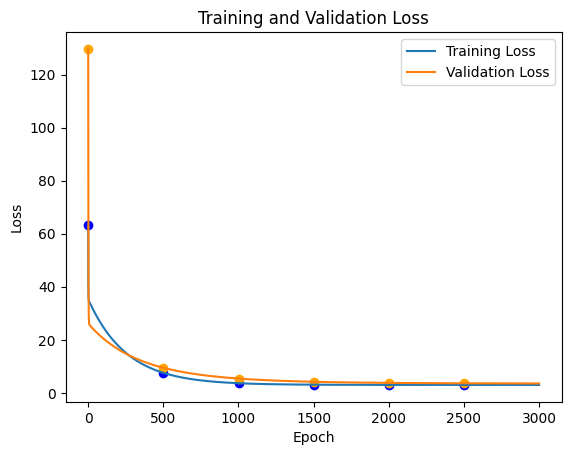

In [ ]:
# visualize
epochs = range(1, len(train_losses) + 1)
plt.plot(epochs, train_losses, label='Training Loss')
plt.plot(epochs, val_losses, label='Validation Loss')
plt.scatter(epochs[::500], train_losses[::500], marker='o', color='blue')
plt.scatter(epochs[::500], val_losses[::500], marker='o', color='orange')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

## Chapter 2
---

Add activation function

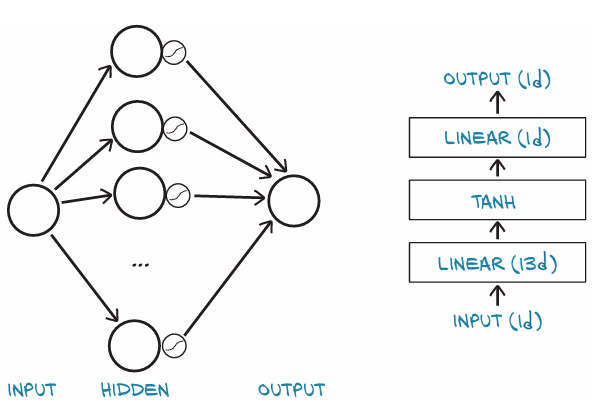

In [ ]:
from IPython import display
display.Image("/home/work/youtube/Deep Learning/flow active.png")

In [ ]:
# create scratch tanh activation
def tanh(x):
    """Formula tanh"""
    numerator = torch.exp(x) - torch.exp(-x)
    denominator = torch.exp(x) + torch.exp(-x)
    result = numerator / denominator
    return result

In [ ]:
# sanichek with module

# input
x = torch.tensor(0.5)

# calculate with scratch
result_scratch = tanh(x)

# calculate with nn module
tanh_module = nn.Tanh()
result_module = tanh_module(x)

print('Scratch result', result_scratch)
print('nn module result', result_module)

Scratch result tensor(0.4621)
nn module result tensor(0.4621)


In [ ]:
# create architecture

# sequence --> sequential architecture
seq_model = nn.Sequential(
            nn.Linear(1, 13), # 1 layer with 13 neuron --> Hidden Layer
            nn.Tanh(), # activatoon
            nn.Linear(13, 1) # 1 layer with 1 neuron --> 1 output neuron
)

seq_model

Sequential(
  (0): Linear(in_features=1, out_features=13, bias=True)
  (1): Tanh()
  (2): Linear(in_features=13, out_features=1, bias=True)
)

In [ ]:
# parameter
[param.shape for param in seq_model.parameters()]

[torch.Size([13, 1]), torch.Size([13]), torch.Size([1, 13]), torch.Size([1])]

In [ ]:
# we can look with dictionary
from collections import OrderedDict

seq_model = nn.Sequential(OrderedDict([('hidden_linear', nn.Linear(1, 8)),
                                       ('hidden_activation', nn.Tanh()),
                                       ('output_linear', nn.Linear(8, 1))]))

seq_model

Sequential(
  (hidden_linear): Linear(in_features=1, out_features=8, bias=True)
  (hidden_activation): Tanh()
  (output_linear): Linear(in_features=8, out_features=1, bias=True)
)

In [ ]:
# check parameter
for name, param in seq_model.named_parameters():
     print(name, param.shape)

hidden_linear.weight torch.Size([8, 1])
hidden_linear.bias torch.Size([8])
output_linear.weight torch.Size([1, 8])
output_linear.bias torch.Size([1])


In [ ]:
# do training
optimizer = optim.SGD(seq_model.parameters(), lr=1e-3)

# training
params, train_losses, val_losses = training_loop(
                                                n_epochs = 3000,
                                                optimizer = optimizer,
                                                loss_fn = nn.MSELoss(),
                                                model = seq_model,
                                                train_t_u = train_t_un,
                                                val_t_u = val_t_un,
                                                train_t_c = train_t_c,
                                                val_t_c = val_t_c
                                                )

print('output', seq_model(val_t_un))
print('answer', val_t_c)
print('hidden', seq_model.hidden_linear.weight.grad)

Epoch 1, Training loss 158.7969, Validation loss 340.5446


Epoch 1000, Training loss 7.1992, Validation loss 6.1011
Epoch 2000, Training loss 2.7481, Validation loss 2.0027
Epoch 3000, Training loss 2.0429, Validation loss 2.1038
output tensor([[13.1584],
        [20.0962]], grad_fn=<AddmmBackward0>)
answer tensor([[15.],
        [21.]])
hidden tensor([[ 0.0071],
        [-0.0101],
        [ 0.0056],
        [-0.0104],
        [ 0.0140],
        [ 0.0328],
        [ 0.0705],
        [-0.0195]])


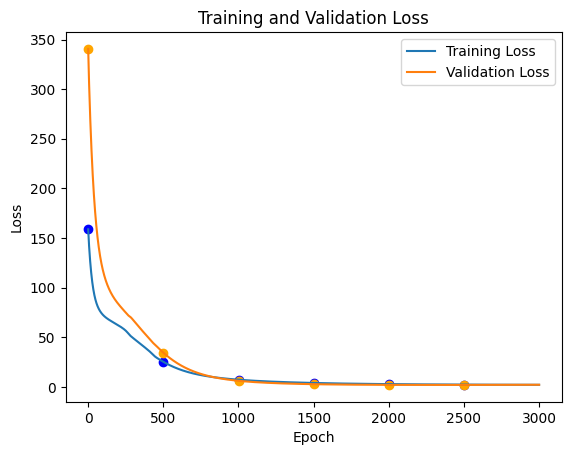

In [ ]:
# visualize
epochs = range(1, len(train_losses) + 1)
plt.plot(epochs, train_losses, label='Training Loss')
plt.plot(epochs, val_losses, label='Validation Loss')
plt.scatter(epochs[::500], train_losses[::500], marker='o', color='blue')
plt.scatter(epochs[::500], val_losses[::500], marker='o', color='orange')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

how we obtain divergence when an optimization algorithm like SGD gets stuck in a steep curve?

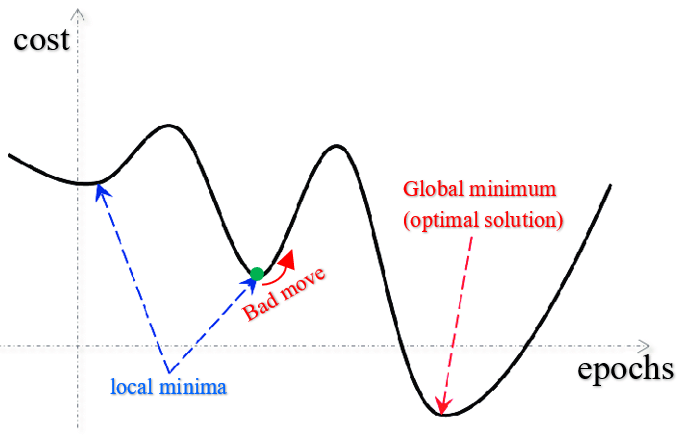

In [ ]:
from IPython import display
display.Image("/home/work/youtube/Deep Learning/stuck momentum.png")

In [ ]:
# add a momentum
optimizer = optim.SGD(seq_model.parameters(), lr=1e-3, momentum=0.9)

# training
params, train_losses, val_losses = training_loop(
                                                n_epochs = 3000,
                                                optimizer = optimizer,
                                                loss_fn = nn.MSELoss(),
                                                model = seq_model,
                                                train_t_u = train_t_un,
                                                val_t_u = val_t_un,
                                                train_t_c = train_t_c,
                                                val_t_c = val_t_c
                                                )

print('output', seq_model(val_t_un))
print('answer', val_t_c)
print('hidden', seq_model.hidden_linear.weight.grad)

Epoch 1, Training loss 1.6320, Validation loss 4.2511
Epoch 1000, Training loss 1.5637, Validation loss 4.7418
Epoch 2000, Training loss 1.4808, Validation loss 5.5106
Epoch 3000, Training loss 1.3928, Validation loss 6.4779
output tensor([[12.9070],
        [18.0713]], grad_fn=<AddmmBackward0>)
answer tensor([[15.],
        [21.]])
hidden tensor([[ 0.0022],
        [ 0.0009],
        [ 0.0144],
        [-0.0049],
        [-0.0015],
        [-0.0049],
        [ 0.0111],
        [-0.0044]])


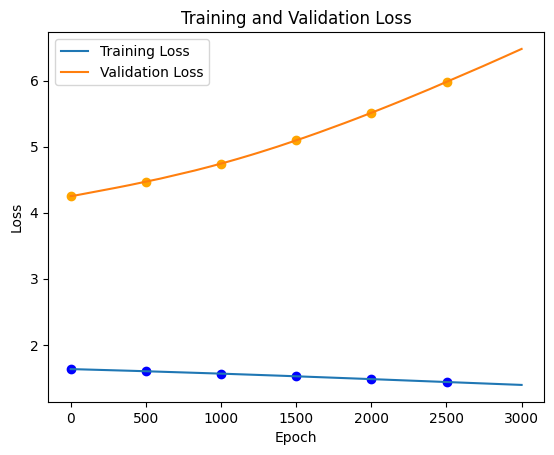

In [ ]:
# visualize
epochs = range(1, len(train_losses) + 1)
plt.plot(epochs, train_losses, label='Training Loss')
plt.plot(epochs, val_losses, label='Validation Loss')
plt.scatter(epochs[::500], train_losses[::500], marker='o', color='blue')
plt.scatter(epochs[::500], val_losses[::500], marker='o', color='orange')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

We don't need for momentum because we can see if we use momentum, so the long jump depends on the setting, how about using 0.2?

In [ ]:
# add a momentum
optimizer = optim.SGD(seq_model.parameters(), lr=1e-3, momentum=0.2)

# training
params, train_losses, val_losses = training_loop(
                                                n_epochs = 3000,
                                                optimizer = optimizer,
                                                loss_fn = nn.MSELoss(),
                                                model = seq_model,
                                                train_t_u = train_t_un,
                                                val_t_u = val_t_un,
                                                train_t_c = train_t_c,
                                                val_t_c = val_t_c
                                                )

print('output', seq_model(val_t_un))
print('answer', val_t_c)
print('hidden', seq_model.hidden_linear.weight.grad)

Epoch 1, Training loss 1.3927, Validation loss 6.4790
Epoch 1000, Training loss 1.3820, Validation loss 6.6072
Epoch 2000, Training loss 1.3713, Validation loss 6.7372
Epoch 3000, Training loss 1.3608, Validation loss 6.8681
output tensor([[12.9092],
        [17.9398]], grad_fn=<AddmmBackward0>)
answer tensor([[15.],
        [21.]])
hidden tensor([[ 0.0022],
        [ 0.0011],
        [ 0.0142],
        [-0.0049],
        [-0.0017],
        [-0.0047],
        [ 0.0107],
        [-0.0043]])


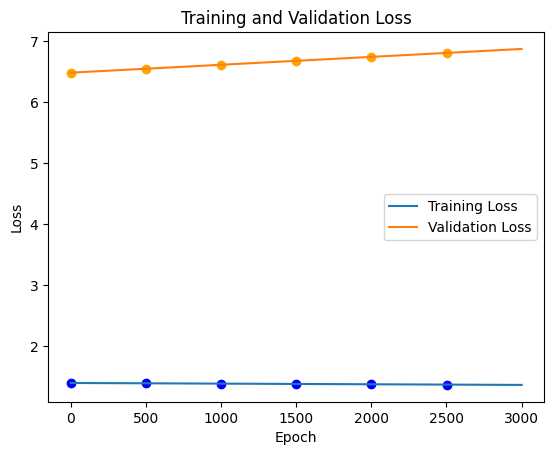

In [ ]:
# visualize
epochs = range(1, len(train_losses) + 1)
plt.plot(epochs, train_losses, label='Training Loss')
plt.plot(epochs, val_losses, label='Validation Loss')
plt.scatter(epochs[::500], train_losses[::500], marker='o', color='blue')
plt.scatter(epochs[::500], val_losses[::500], marker='o', color='orange')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()